<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/3.%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 로지스틱회귀활용

공부한 로지스틱 회귀를 활용해보자. 캐글 타이타닉 데이터셋이다.

## 3.1 데이터 다운로드

아래 링크를 클릭하면 구글 드라이브에 저장된 데이터가 있다. 눌러서 다운로드 받으면 된다.

출처 : https://www.kaggle.com/c/titanic/data

https://drive.google.com/open?id=1nd61rKLxciwrFHahU1PJORQQK0eIfbUg #train.csv

https://drive.google.com/open?id=1Cu2TyQ9zolVKmFHFN270xLnDa5PhBonm #test.csv

##3.2 데이터 불러오기

*   데이터 설명

> The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features. 

> The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

*   특징 데이터 (11개)

> PassengerId : 승객 Id

> Pclass : 티켓 클래스 1st=1, 2nd=2, 3rd=3

> Name : 승객 이름

>	Sex : 승객 성별

>	Age : 승객 나이

>	SibSp : 함께 탑승한 형제 / 자매의 수

>	Parch : 함께 탑승한 부모 / 자식의 수

>	Ticket : 티켓 번호

>	Fare : 운임료

> Cabin : 선실 번호	

> Embarked : 승선한 항구 이름 , C = Cherbourg, Q = Queenstown, S = Southampton

* 타겟 데이터 (1개)

> Survived : 생존했으면 1, 아니면 0

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/drive/My Drive/데이터/캐글 타이타닉 데이터/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/content/drive/My Drive/데이터/캐글 타이타닉 데이터/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape, test.shape)

(891, 12) (418, 11)


##3.3 데이터 전처리

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


여기서부터는 캐글 유저의 노트북을 필사했다.

출처 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

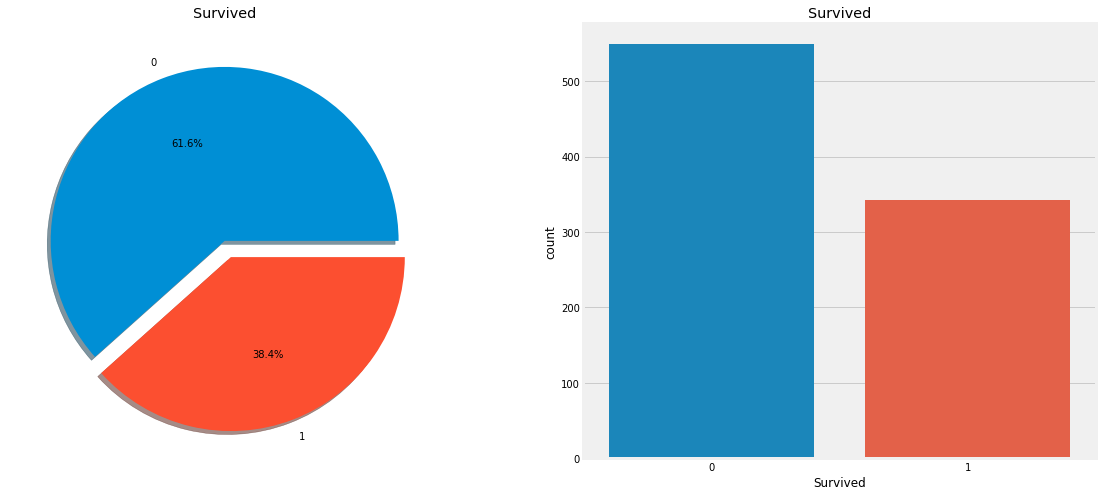

In [8]:
# 얼마나 살았을까?

f, ax = plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

891명 중 350명 정도 (38.4%)가 살았다.

범주형 데이터인 Sex에 대해 분석해보자.

In [9]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

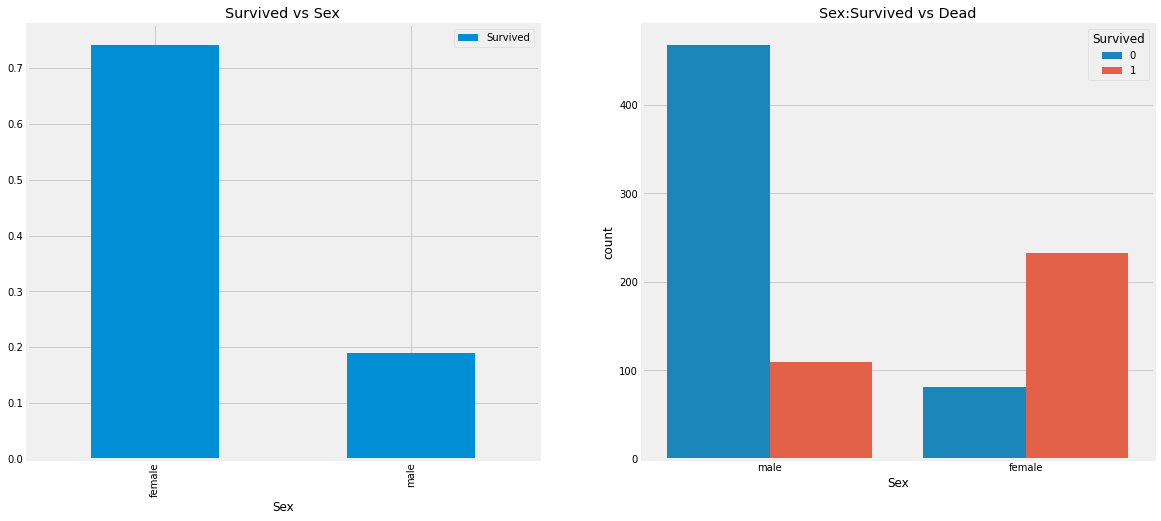

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여자가 더 많이 산다는 걸 알 수 있다.

이번엔 범주형 데이터인 Pclass에 대해 분석해보자.


In [11]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


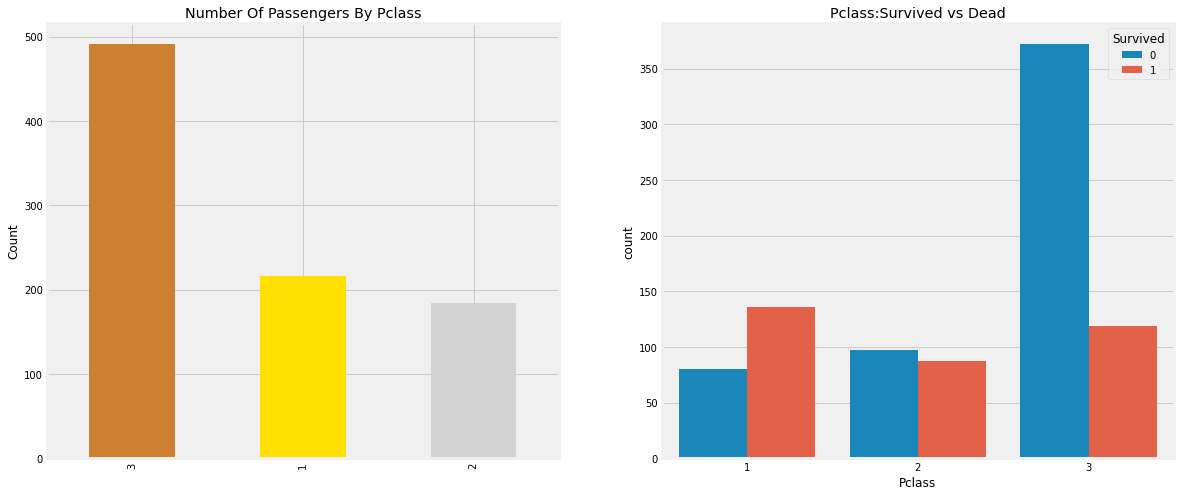

In [12]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

승객의 수는 3등석 > 1등석 > 2등석,

1등석이 가장 많이 산다는 것을 알 수 있다.

이제 Sex와 Pclass를 합쳐서 보겠다.

In [13]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

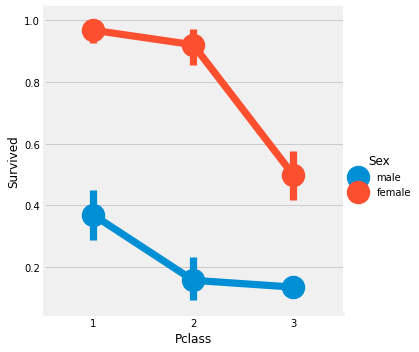

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

1등석인 여자가 가장 많이 살고, 3등석인 남자가 가장 많이 죽었다.

이제 Age에 대해 분석해보자

In [15]:
print('Oldest Passenger was of:', train['Age'].max(), 'Years')
print('Youngest Passenger was of:', train['Age'].min(), 'Years')
print('Average Age on the ship:', train['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


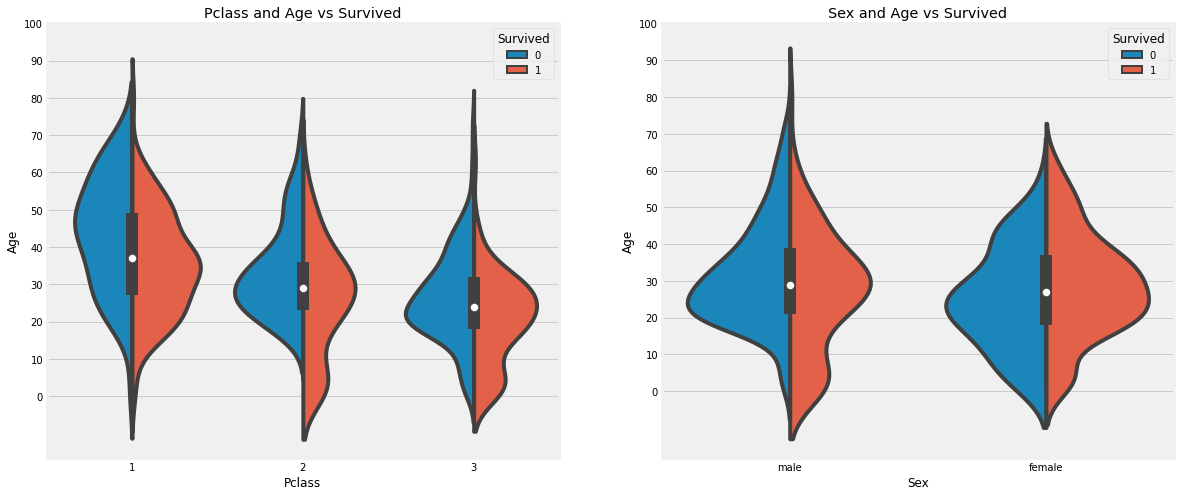

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

10대는 3등석으로 갈수록 인원 수가 많아진다.

20대 ~ 50대의 여성이 살 확률이 높다.

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age는 177개의 결측치가 있다. 

이름으로 Age를 추측해서 넣어주자.

In [18]:
train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [0]:
train['Initial'] = 0
for i in train:
  train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.') #정규표현식 [A-Za-z]대문자소문자 W. .으로 끝나는 것들

In [20]:
#특정 단어를 지닌 사람이 무슨 성별일지 알아보자.
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
#특정 단어를 Miss, Mr, Mrs, Other로 바꿔줬다. 도메인 지식이 필요할 듯하다. Miss, Mr는 Title이라고 부른다고 한다.
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                         inplace=True)


In [22]:
#이제 Title로 나이를 평균내어보자.
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [0]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [24]:
#결측치가 다 채워졌는지 확인하자.
train.Age.isnull().any()

False

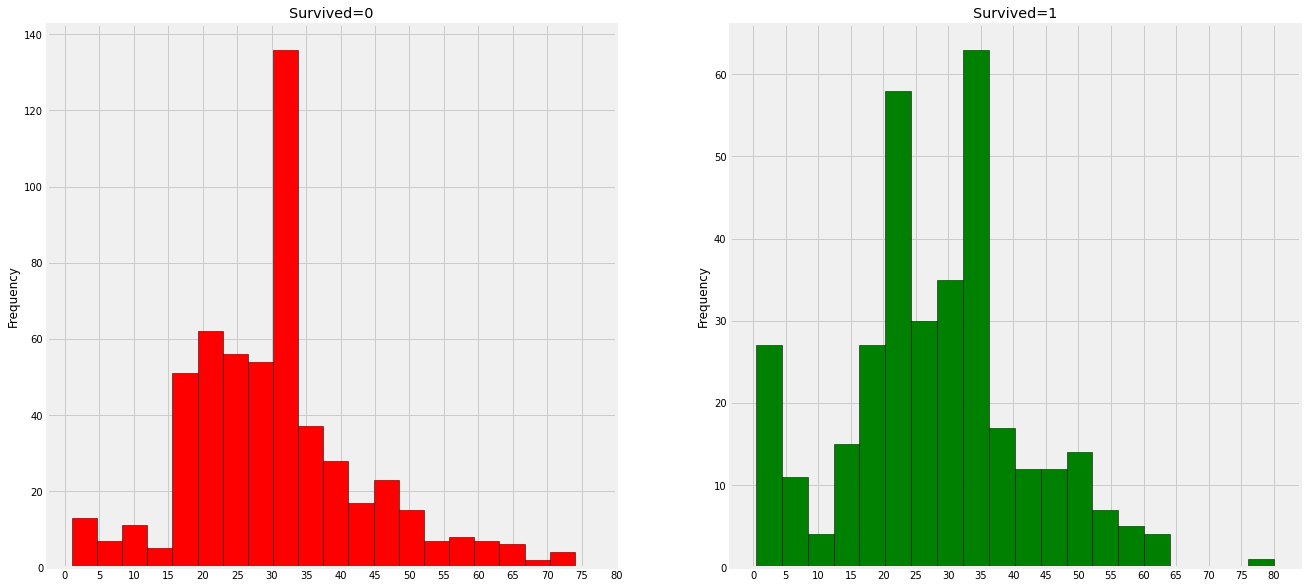

In [25]:
f, ax = plt.subplots(1,2,figsize=(20, 10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

아이와 여자 먼저인 방식때문인지 아이의 생존률이 높다.

30대가 많이 죽었다.

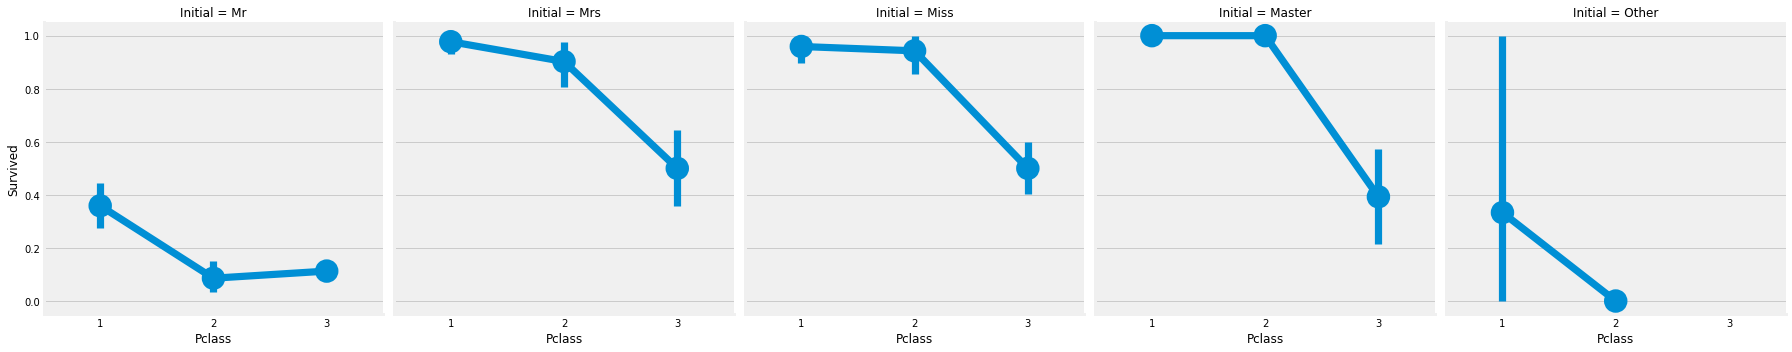

In [26]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=train)
plt.show()

아이와 여자 먼저는 Pclass에 관계없이 적용하는 것 같다.

다음은 Embarked로 범주형 데이터이다.

In [27]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins=True).style.background_gradient(cmap='summer_r')

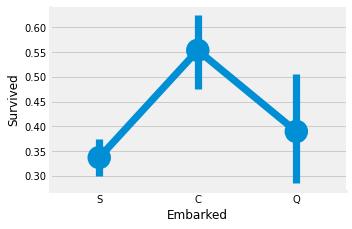

In [28]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()


C항구에서 탑승한 사람들이 생존률이 가장 높다.

S항구에서 탑승한 사람들이 생존률이 가장 낮다.

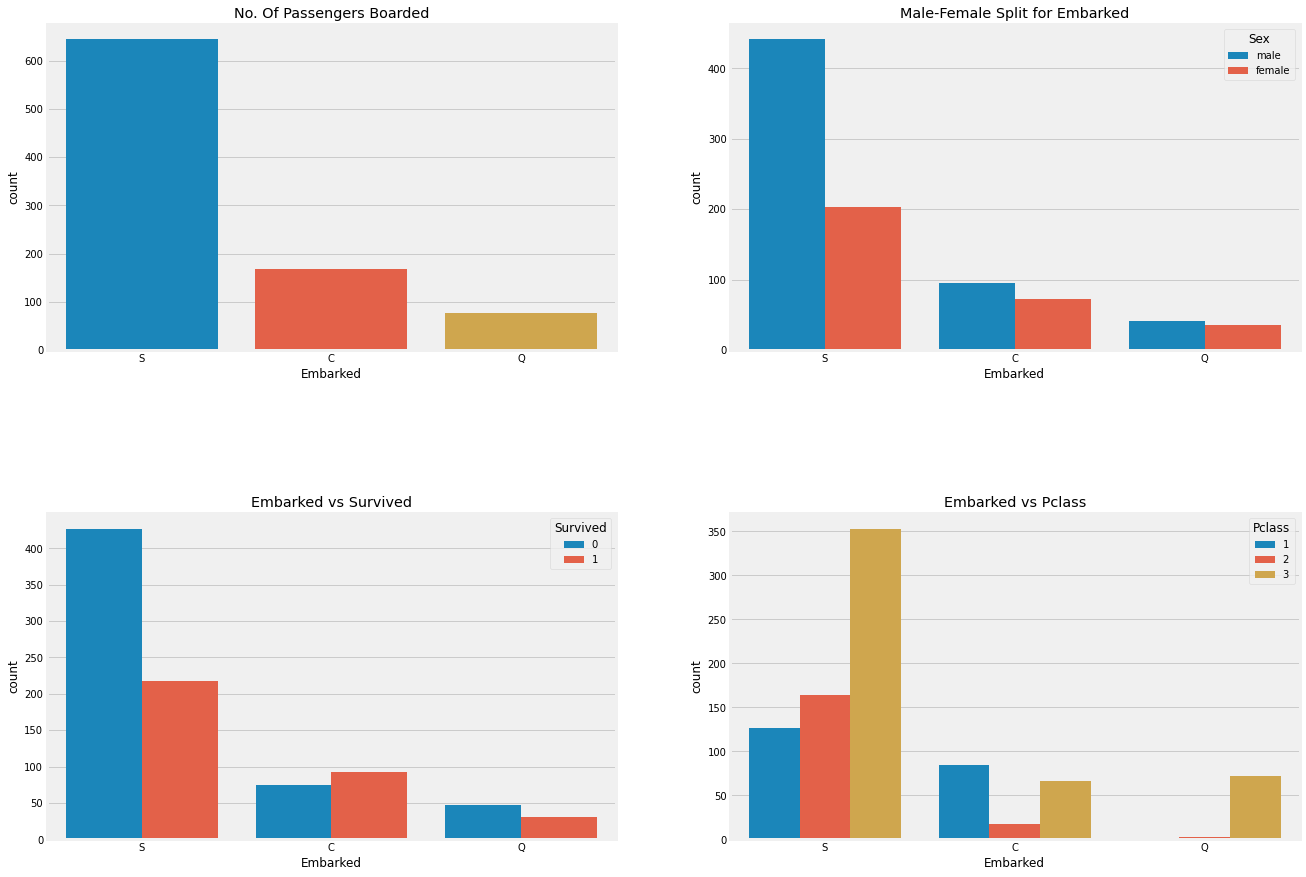

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


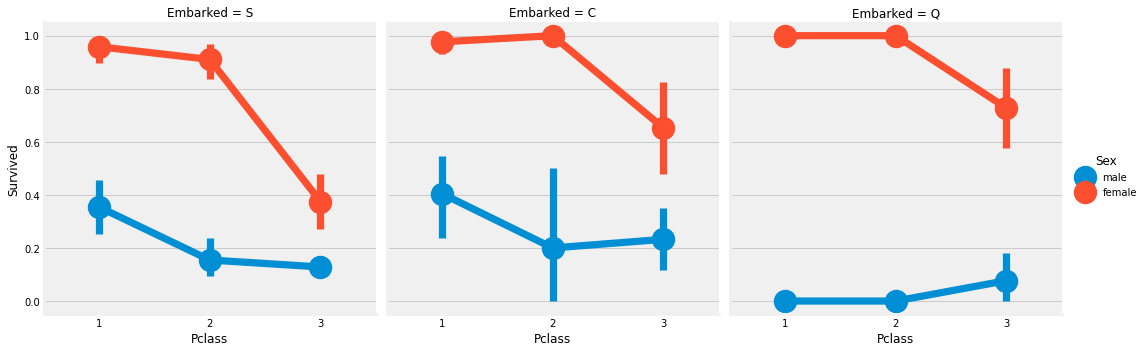

In [30]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train)
plt.show()

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [0]:
# S항구 탑승자가 제일 많으니 S로 채워주자
train.Embarked.fillna('S', inplace=True)

In [33]:
train.Embarked.isnull().any()

False

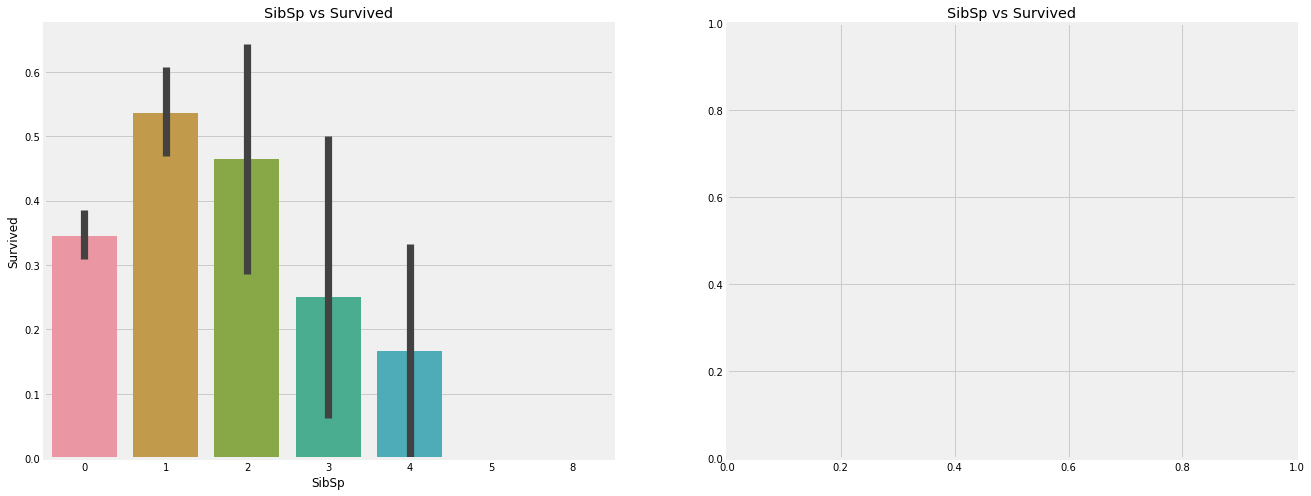

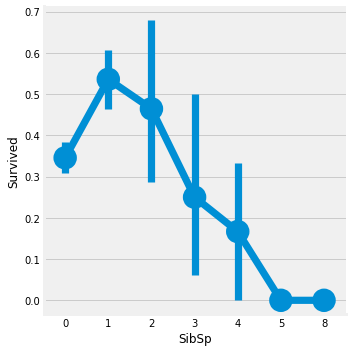

In [34]:
# SibSp 과 Survived 를 시각화해보자.

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

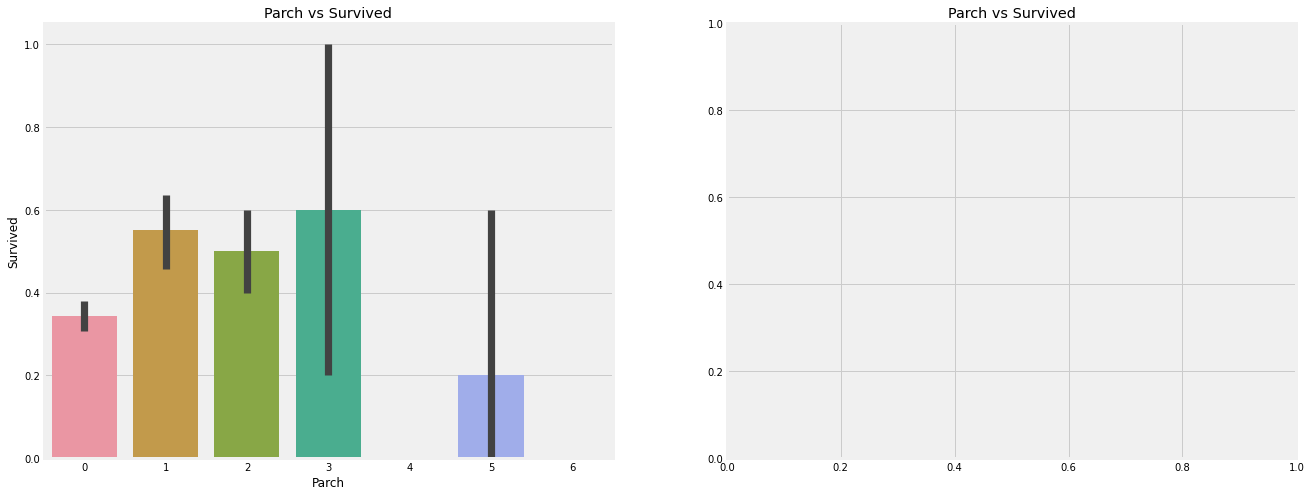

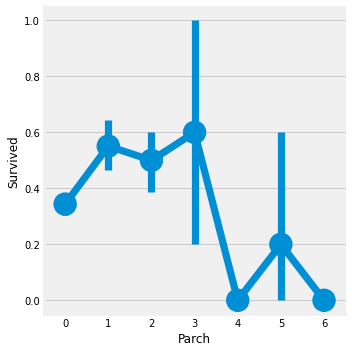

In [35]:
# Parch 와 Survived 를시각화해보자.

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

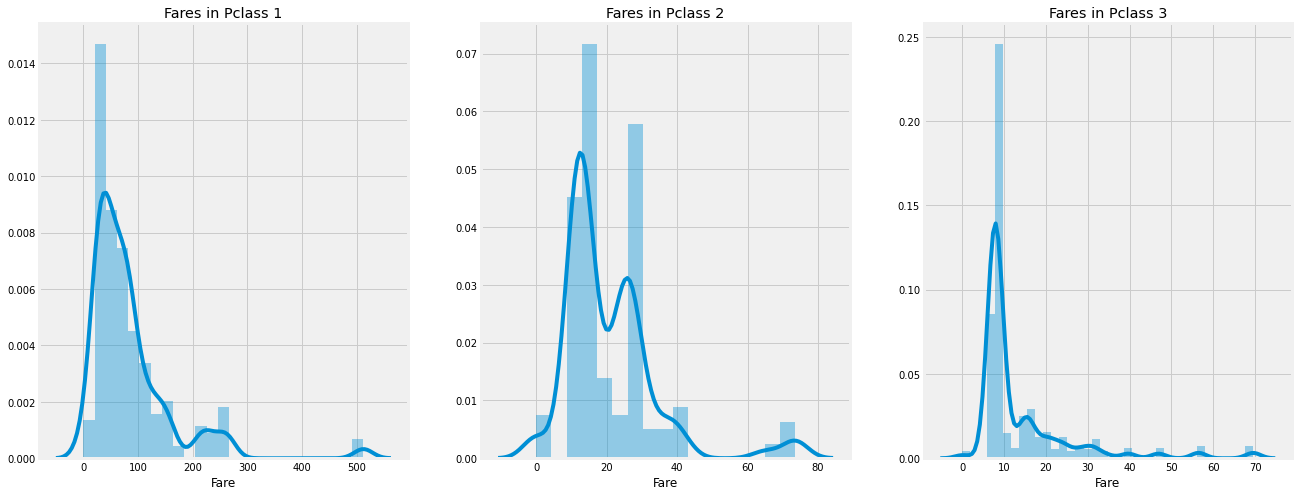

In [36]:
# Fare을 Pclass 마다 시각화해보자.

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


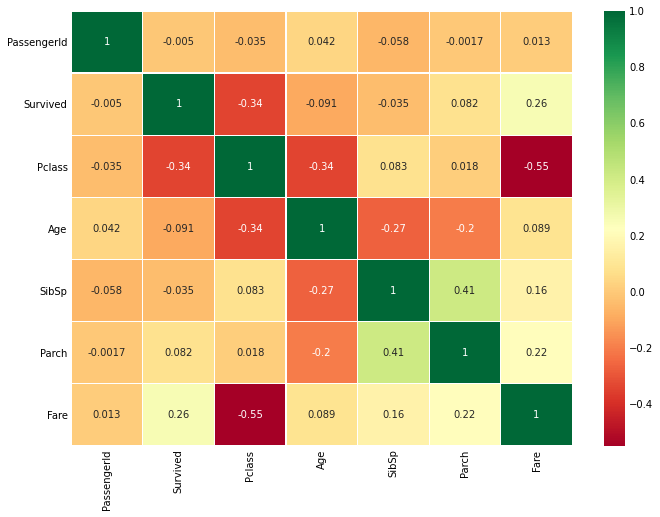

In [37]:
# 상관관계를 봐보자.

sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [38]:
# Age가 80까지이니 5구간으로 나눈다.

train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


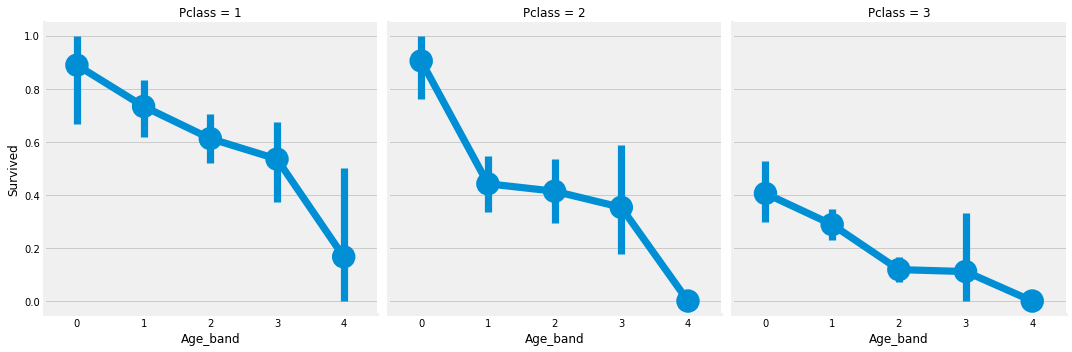

In [39]:
sns.factorplot('Age_band','Survived',data=train,col='Pclass')
plt.show()

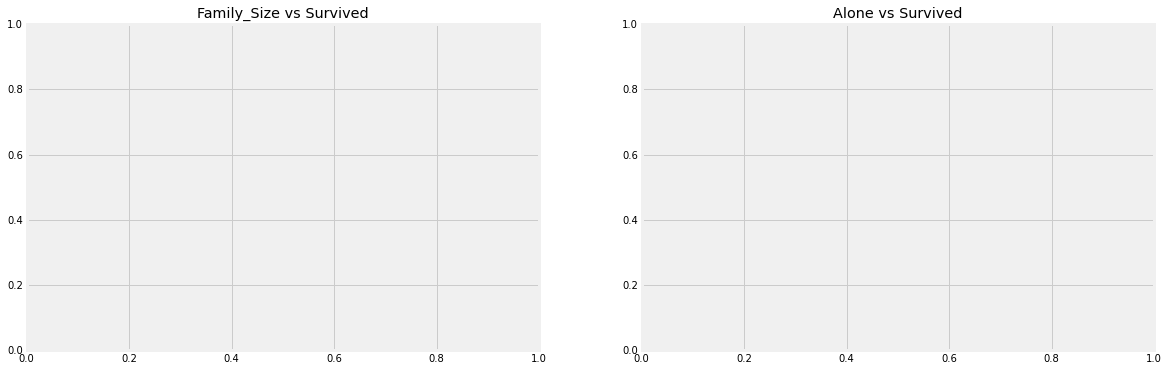

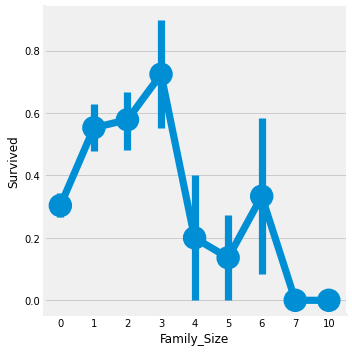

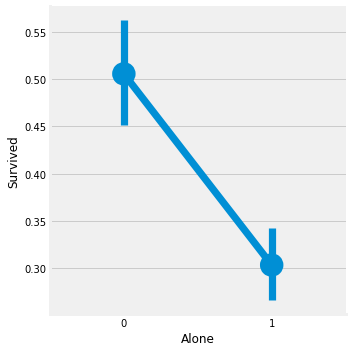

In [40]:
# Family_szie 와 Alone 가족의 유무와 생존률을 시각화하자.

train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp'] #family size
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1 #Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

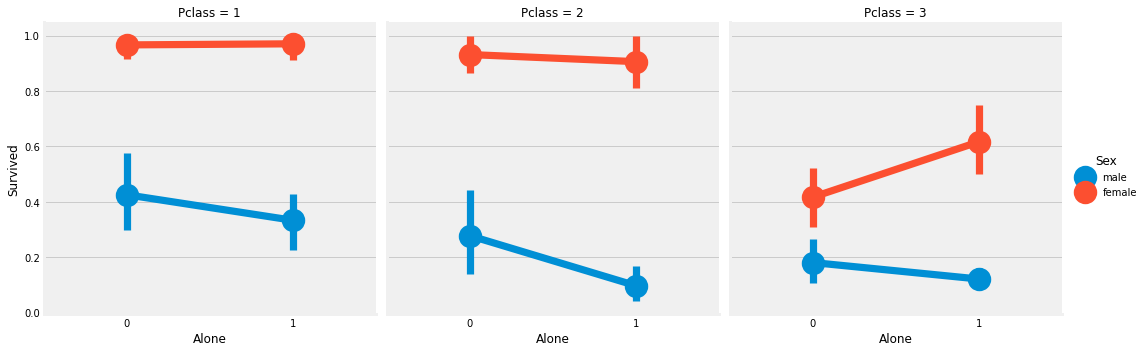

In [41]:
sns.factorplot('Alone','Survived',data=train,hue='Sex',col='Pclass')
plt.show()

In [42]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

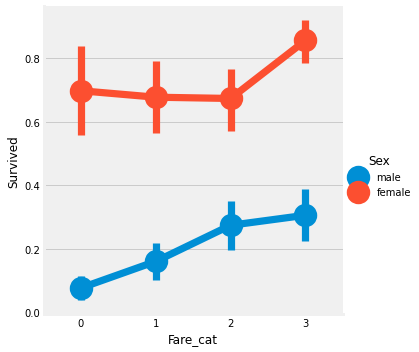

In [44]:
sns.factorplot('Fare_cat','Survived',data=train,hue='Sex')
plt.show()

In [0]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

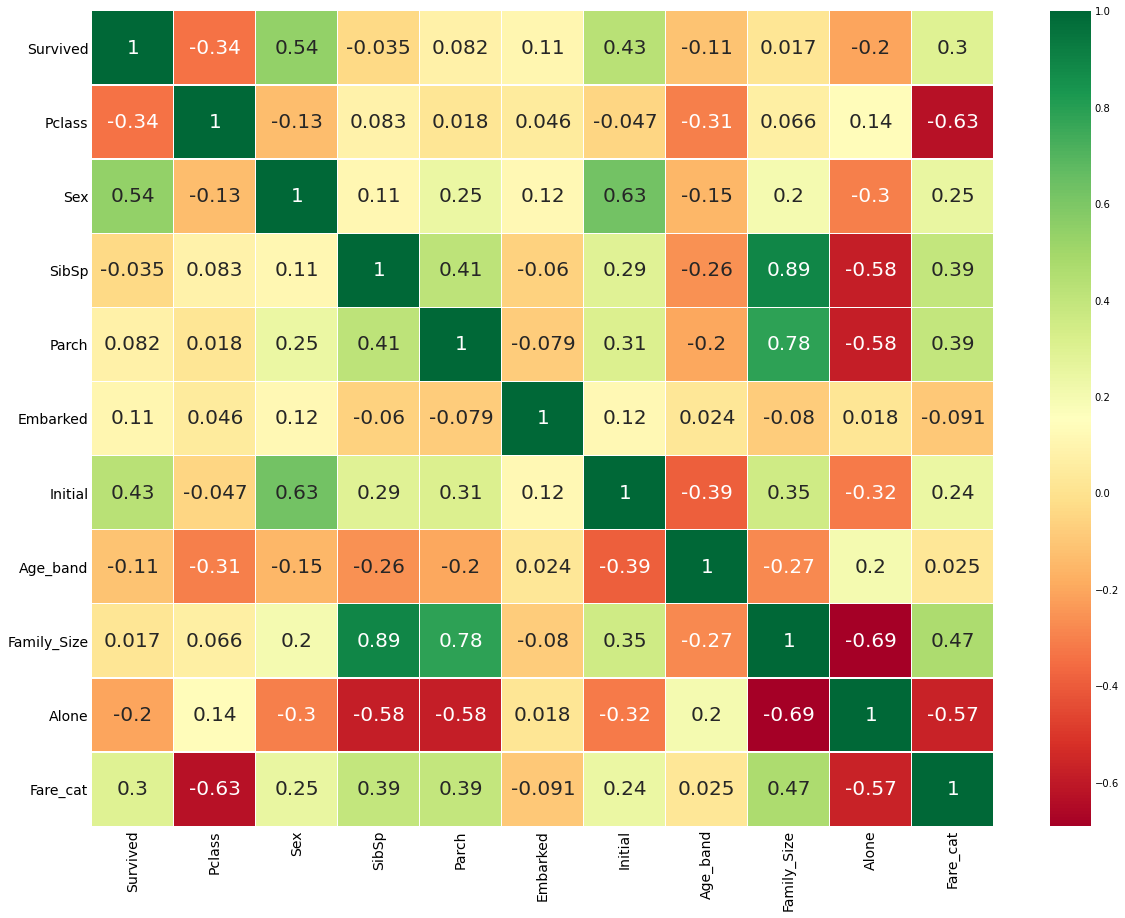

In [46]:
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계



In [47]:
# 상관계수의 절댓값이 0.1 보다 낮은 특성을 찾자.
temp = []
for i, v in enumerate(train.corr()['Survived']):
  if abs(v) < 0.1:
    temp.append(train.corr()['Survived'].index[i])
temp

['SibSp', 'Parch', 'Family_Size']

In [48]:
# 상관계수의 절대값이 0.1 보다 낮은 특성은 버리자.
train = train.drop(temp, axis=1)
train.head()

,Survived,Pclass,Sex,Embarked,Initial,Age_band,Alone,Fare_cat
0,0,3,0,0,0,1,0,0
1,1,1,1,1,1,2,0,3
2,1,3,1,0,2,1,1,1
3,1,1,1,0,1,2,0,3
4,0,3,0,0,0,2,1,1


In [49]:
# 모델에 넣을 특성들을 표준화를 시켜주자.
x_temp = train.drop(['Survived'], axis=1)
x_temp = x_temp.apply(lambda x: (x - x.mean()) / x.std())
x_temp

,Pclass,Sex,Embarked,Initial,Age_band,Alone,Fare_cat
0,0.826913,-0.737281,-0.568518,-0.733692,-0.522280,-1.230954,-1.346021
1,-1.565228,1.354813,1.004617,0.264353,0.664842,-1.230954,1.336987
2,0.826913,1.354813,-0.568518,1.262398,-0.522280,0.811467,-0.451685
3,-1.565228,1.354813,-0.568518,0.264353,0.664842,-1.230954,1.336987
4,0.826913,-0.737281,-0.568518,-0.733692,0.664842,0.811467,-0.451685
...,...,...,...,...,...,...,...
886,-0.369158,-0.737281,-0.568518,3.258488,-0.522280,0.811467,-0.451685
887,-1.565228,1.354813,-0.568518,1.262398,-0.522280,0.811467,0.442651
888,0.826913,1.354813,-0.568518,1.262398,-0.522280,-1.230954,0.442651
889,-1.565228,-0.737281,1.004617,-0.733692,-0.522280,0.811467,0.442651


In [50]:
# 데이터프레임 형식은 텐서로 못 바꾼다. 어레이로 만들어 주자.
x = x_temp.values 
y = train[['Survived']].values

print(x.shape, y.shape)

(891, 7) (891, 1)


##3.4 커스텀 데이터셋 만들기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [0]:
class MyDataset(Dataset):
  #데이터셋의 전처리를 해주는 부분
  def __init__(self):
    self.x_data = torch.tensor(x, dtype=torch.float)
    self.y_data = torch.tensor(y, dtype=torch.float)
    
  #데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
  def __len__(self):
    return len(self.x_data)
  
  #데이터셋에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [0]:
dataset = MyDataset()

In [54]:
# train set 와 validation set로 나누는 비율 정하기

train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

# train set와 validation set로 나누자

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

712 179
712 179


In [0]:
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=len(val_dataset), shuffle=True)

##3.5 모델 학습하기

In [0]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(7, 1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    return self.sigmoid(self.linear(x))


In [0]:
model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [58]:
nb_epochs = 1000
train_losses = []
val_losses = []
for epoch in range(nb_epochs+1):
  for x_train, y_train in train_loader:

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    train_losses.append(cost.item())
    if epoch % (nb_epochs/10) == 0:
      print(f'Epoch : {epoch}/{nb_epochs}')
      print(f'Train Cost : {cost.item()}')

  for x_val, y_val in val_loader:
    hypothesis = model(x_val)
    cost = F.binary_cross_entropy(hypothesis, y_val)
    val_losses.append(cost.item())
    if epoch % (nb_epochs/10) == 0:
      print(f'Validation Cost : {cost.item()}')
      print('-'*50)
prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
correct_prediction = prediction.float() == y_val # 실제값과 일치하는 경우만 True로 간주
accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
print(f'Accuracy : {accuracy * 100}%')

Epoch : 0/1000
Train Cost : 0.7869837880134583
Validation Cost : 0.7526401281356812
--------------------------------------------------
Epoch : 100/1000
Train Cost : 0.4750153720378876
Validation Cost : 0.47512340545654297
--------------------------------------------------
Epoch : 200/1000
Train Cost : 0.4529714286327362
Validation Cost : 0.4615854322910309
--------------------------------------------------
Epoch : 300/1000
Train Cost : 0.44591373205184937
Validation Cost : 0.45973777770996094
--------------------------------------------------
Epoch : 400/1000
Train Cost : 0.44284331798553467
Validation Cost : 0.4600622057914734
--------------------------------------------------
Epoch : 500/1000
Train Cost : 0.44131535291671753
Validation Cost : 0.4608195126056671
--------------------------------------------------
Epoch : 600/1000
Train Cost : 0.44049981236457825
Validation Cost : 0.46158063411712646
--------------------------------------------------
Epoch : 700/1000
Train Cost : 0.4400

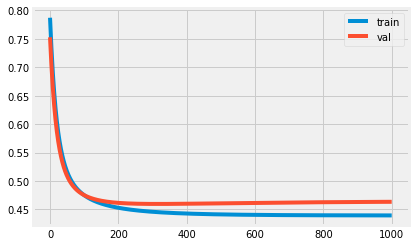

In [59]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

##3.6 랜덤포레스트랑 비교하기

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(x_train, y_train)

y_val_pred = model_forest.predict(x_val)

from sklearn import metrics 
acc_forest = metrics.accuracy_score(y_val, y_val_pred)

In [61]:
print(f'acc_forest : {acc_forest}, acc_mymodel : {accuracy}')

acc_forest : 0.8212290502793296, acc_mymodel : 0.7486033519553073
